<a href="https://colab.research.google.com/github/uol-mediaprocessing/notebooks/blob/master/5-filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filters

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
plt.rcParams["figure.figsize"] = (10, 10)

First of all, let's take a picture:

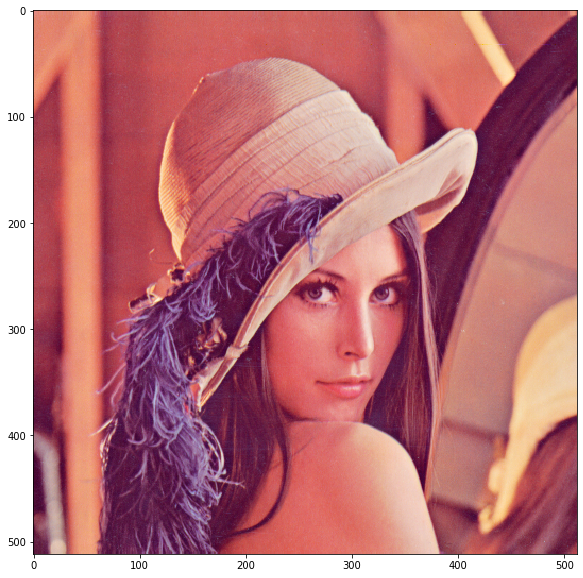

In [20]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/notebooks/master/pictures/Lenna.png
img = cv2.imread("Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Box Filter
The box filter is the simplest blurring filter. For each pixel, it calculates the average value of the region around the pixel.  
For example, a 5x5 box filter kernel looks like this: 

$
\frac{1}{25} * 
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$

We can apply it in OpenCV with the function `cv2.blur`:

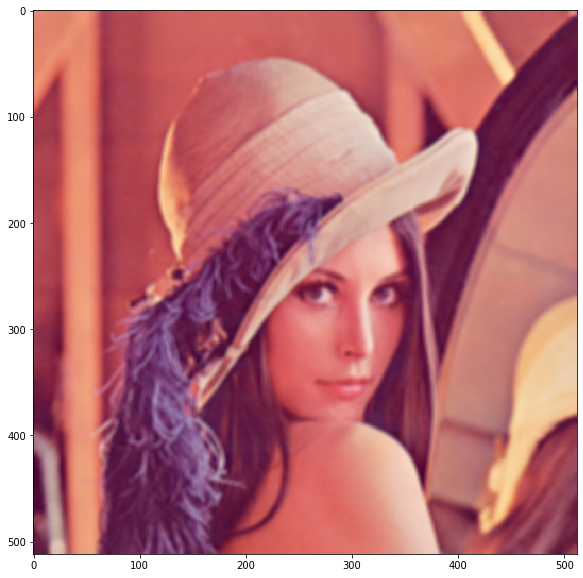

In [21]:
filtered = cv2.blur(img, ksize=(5, 5))
plt.imshow(filtered)

# Gaussian Blur Filter
The kernel of the Gaussian blur filter has higher values in the middle and creates a smoother image:

$
\begin{bmatrix}
0.003765 & 0.015019	& 0.023792 & 0.015019 & 0.003765 \\
0.015019 & 0.059912 & 0.094907 & 0.059912 & 0.015019 \\
0.023792 & 0.094907 & 0.150342 & 0.094907 & 0.023792 \\
0.015019 & 0.059912 & 0.094907 & 0.059912 & 0.015019\\
0.003765 & 0.015019 & 0.023792 & 0.015019 & 0.003765
\end{bmatrix}
$

You can adjust the filter with the `sigmaX` parameter.

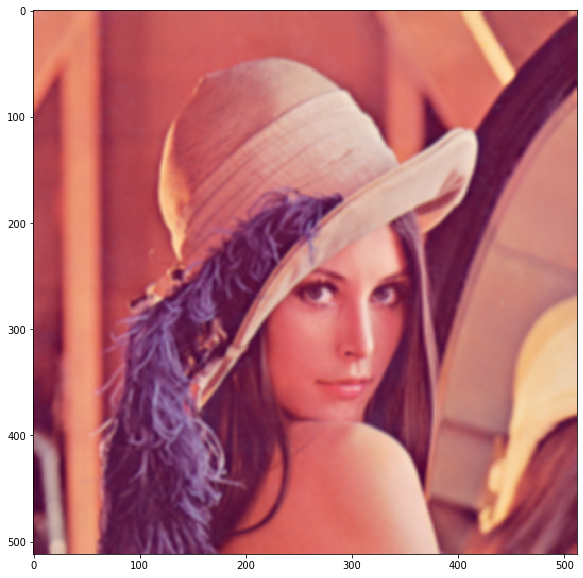

In [22]:
filtered = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=2)
plt.imshow(filtered)

# Custom Filters
In OpenCV, we can define a custom filter like this:

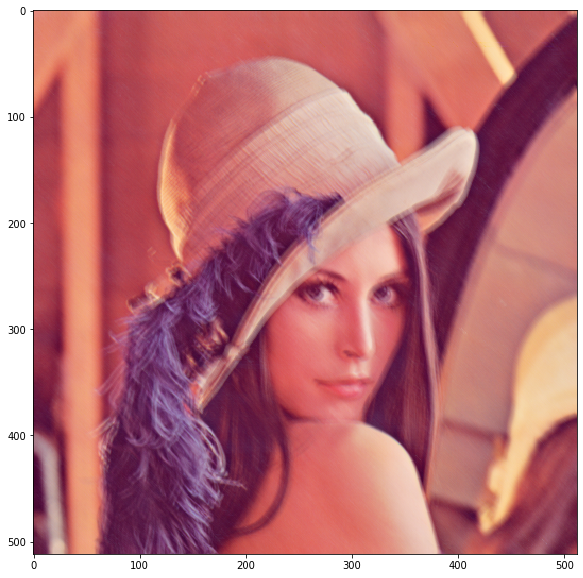

In [27]:
kernel = np.array([
    [4, 0, 0, 0, 0],
    [0, 2, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 2, 0],
    [0, 0, 0, 0, 4]
])
kernel = kernel / kernel.sum()
filtered = cv2.filter2D(img, cv2.CV_16S, kernel)
plt.imshow(filtered)